# Extended Showcase: Visualizations and Explanations
# Visualization

This notebook is intended to serve as an extended visualization and explanation document for our paper manuscript. We aim to show some insights about the softwood and hardwood wood sample data ($\textit{Pinus sylvestris}$ and $\textit{Acer pseudoplatanus}$) recorded with our advanced sub-μ-CT imaging setup. For this, we provide two sample data chunks from both classes. These sample data chunks are downloaded from the open-source data sharing platform Zenodo via the DOI
<a href="https://doi.org/10.5281/zenodo.13905949"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.13905949.svg" alt="DOI"></a>
For enhanced viewer and reader advantages, we enriched the data presentation with purpose-built interactive visualizations of the data. 
The first provided visualization allows the inspection of different slices (cross section images) of the sample volumes. The aspect, i.e. orientation of the cross section can be switched.
The second provided visualization consists of a dynanmic and interactive volumetric rendering of a sample chunk of both classes.

Note: To actually run the ntoebook code live in your browser, select 'Run' $\rightarrow$ 'Run All Cells' in the drop down menu bar.
Since we are running on public resources, please allow up to 90 seconds runtime for the resource-intensive visualizations cells.

2024, Jannik Stebani

IAWA Paper Manuscript by Jannik Stebani, Tim Lewandrowski, Kilian Dremel, Simon Zabler and Volker Haag: "Technical framework presentation of advanced volumetric sub-μ-CT imaging integrated with adaptable deep learning-based wood species classification"

In [1]:
from pathlib import Path
import numpy as np
import ipywidgets as wgt
import k3d
from rich import print as pprint

In [2]:
# essential: use reactive backend
%matplotlib widget

We first make use of the data loading facilities of the `wn_companion` package. Then, both datasets get visualized separately in 2D and in 3D!

In [4]:
from wn_companiontools.data.loading import read_data_from_hdf5, read_fingerprint_from_hdf5
from wn_companiontools.visualization.common import COLORMAPS
from wn_companiontools.visualization.planar import SliceDisplay
from wn_companiontools.visualization.volumetric import VolumeDisplay

In [5]:
# here we read all input data from
ARTIFACT_DIR = Path('./artifacts')
# for zarr and HDF5, this internal path can be used to bundle versions of the same dataset in a single file-like object
INTERNAL_PATH: str = 'scangroup/dataset'

Ensuring it is data there, loading and checking some basic properties ...

In [6]:
ACER_DATA_PATH = ARTIFACT_DIR / 'acer-artifact.hdf5'
assert ACER_DATA_PATH.is_file(), 'setup failure: acer artifact is missing'

In [7]:
PINUS_DATA_PATH = ARTIFACT_DIR / 'pinus-artifact.hdf5'
assert PINUS_DATA_PATH.is_file(), 'setup failure: pinus artifact is missin'

In [8]:
acer_data = read_data_from_hdf5(ACER_DATA_PATH, INTERNAL_PATH)
acer_fingerprint = read_fingerprint_from_hdf5(ACER_DATA_PATH, INTERNAL_PATH)
pprint(f'acer data shape: {acer_data.shape}')
pprint(acer_fingerprint)

acer data shape: (256, 256, 256)
{'ID': np.int64(10), 'averages': np.int64(1), 'class_': 'acer', 'current': '200muA', 'duration': '5s', 'voltage': '40kV'}


In [9]:
pinus_data = read_data_from_hdf5(PINUS_DATA_PATH, INTERNAL_PATH)
pinus_fingerprint = read_fingerprint_from_hdf5(PINUS_DATA_PATH, INTERNAL_PATH)
pprint(f'pinus data shape: {acer_data.shape}')
pprint(pinus_fingerprint)

pinus data shape: (256, 256, 256)
{'ID': np.int64(6), 'averages': np.int64(1), 'class_': 'pinus', 'current': '200muA', 'duration': '5s', 'voltage': '40kV'}


## Acer: 2D Planar Visualization

Here, we take a look at the *Acer pseudoplatanus* data in the canonical 2D view.

We can adjust the following parameters of the display dynamically:

- lower and upper windowing levels
- color map
- image cross section
- slice index of the image cross section

For this, use the controls provided below the image figure. Just play around! If you want to reset the view, just re-evaluate both notebook cells (display and controls).

Due to the internal architecture of `matplotlib` and the higher resolution, the figure is sadly not that responsive. A short amount of watining after maniupulating the controls may yield the desired output.
We chose the traditional `matplotlib` way so that direct comparisons to the figures provided in our paper manuscript can be made.

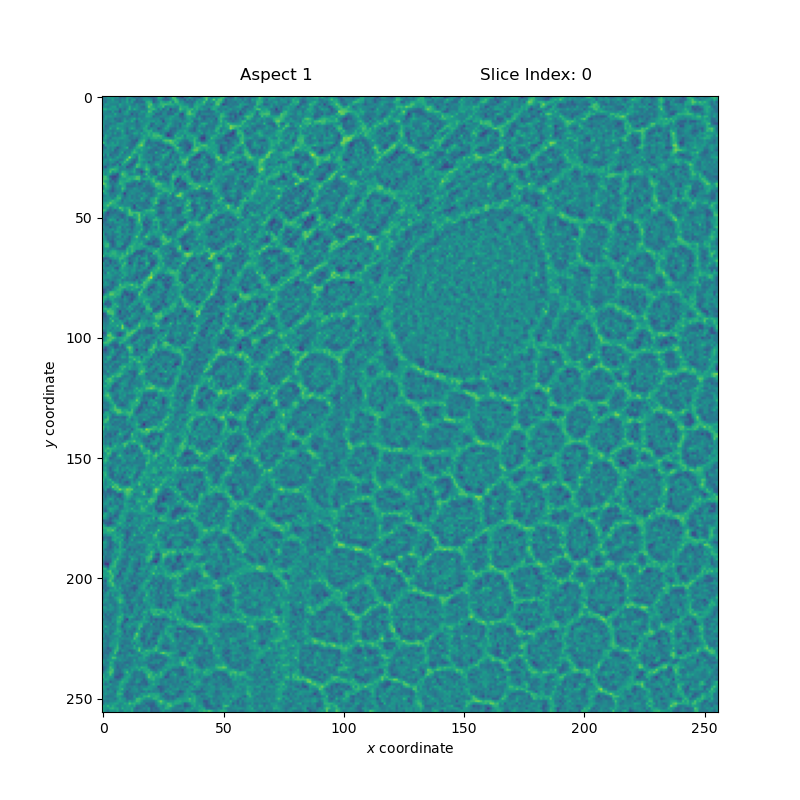

In [10]:
slicedisplay_acer = SliceDisplay(acer_data)

In [11]:
slicedisplay_acer.get_controls()

## Pinus: 2D Planar Visualization

Here, we take a look at the *Pinus sylvestris* data in the canonical 2D view. All other considerations are similar.

We can adjust the following parameters of the display dynamically:

- lower and upper windowing levels
- color map
- image cross section
- slice index of the image cross section

For this, use the controls provided below the image figure. Just play around! If you want to reset the view, just re-evaluate both notebook cells (display and controls).

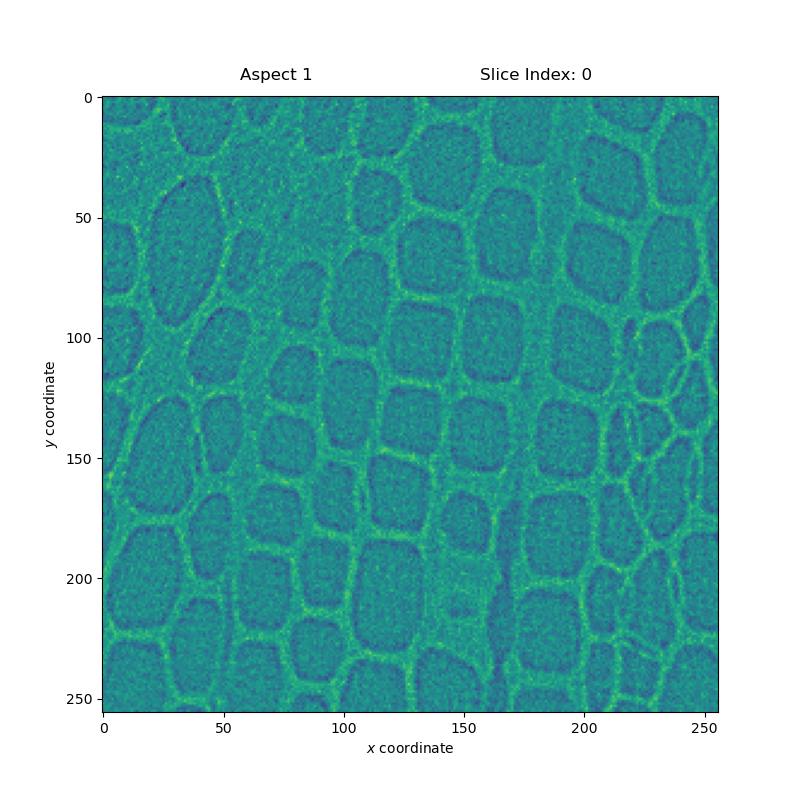

In [12]:
slicedisplay_pinus = SliceDisplay(pinus_data)

In [13]:
slicedisplay_pinus.get_controls()

## Acer: 3D Volumetric Visualization

Now we proceeed to another hopefully interesting showcase, namely the volumetric rendering of *Acer pseudoplatanus* data.

In the 3D rendering, we can adjust the following parameters of the display dynamically:

- lower and upper windowing levels
- color map
- rendering zoom level
- rendering orientation

For windowing and color map, use the controls provided below the image figure.
For the zoom level and orientation, you can use the mouse wheel and drag-and-rotate when your pointer is inside the figure. This should be quite intuitive.
Just play around! If you want to reset the view, just re-evaluate both notebook cells (display and controls).

In [14]:
volumedisplay_acer = VolumeDisplay(acer_data)

In [15]:
volumedisplay_acer.plot.display()

Output()

In [16]:
volumedisplay_acer.get_controls()

## Pinus: 3D Volumetric Visualization

We can conclude this visualization showcase by proceeeding to the volumetric rendering of *Pinus sylvestris* data.

In the 3D rendering, we can adjust the following parameters of the display dynamically:

- lower and upper windowing levels
- color map
- rendering zoom level
- rendering orientation

For windowing and color map, use the controls provided below the image figure.
For the zoom level and orientation, you can use the mouse wheel and drag-and-rotate when your pointer is inside the figure. This should be quite intuitive.
Just play around! If you want to reset the view, just re-evaluate both notebook cells (display and controls).

In [17]:
volumedisplay_pinus = VolumeDisplay(pinus_data)

In [18]:
volumedisplay_pinus.plot.display()

Output()

In [19]:
volumedisplay_pinus.get_controls()